<a href="https://colab.research.google.com/github/Rylhe/Introduction-to-ML/blob/main/1577215249.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP0088 Individual Coursework: **Heroes of Machlearnia**


# Instructions

For this assignment you are asked to analyse some data and make
predictions from it, explaining and justifying the choices you
make along the way.

**Your dataset is ID 1577215249. This data is unique to you.**

Although everyone is solving the same overall shape of problem, the
details will vary and may give rise to answers that are qualitatively
and numerically different. Do not be surprised if your results do not
agree with those of your colleagues.

The tasks below are mostly solvable with methods covered in the first
half of the module, prior to the coursework release.
One task is deceptively difficult and you may not be able to solve it
“properly”; that is okay, do what you can with the tools available
to you and try to explain why they might be insufficient.
You may employ other methods from beyond the module if you wish,
but there are no bonus marks available for doing so.

All tasks should be performed within this notebook.
For each task, we include:

* an editable **code cell**, in which you should write any code needed
to solve the problem and generate the requisite outputs
* an editable **markdown cell**, in which you should *briefly* explain
your approach and point out anything interesting about the problem
or results

You may find it useful to add further cells for a task, for example to
make your code structure clearer or to interleave plots with your
explanation — this is fine, but make sure that the order and meaning
are unambiguous, and that executing **Run all** on the notebook from
scratch works without errors. Also note that if you split up your text
answer into multiple cells, the word limit applies to the combined total.

**Once you have completed all tasks, submit the whole notebook via Moodle,
along with a CSV file of results that you will generate below.**


# Background

In the bleak highland province of Machlearnia, four clans of
whisky-sodden, claymore-wielding, kilted and bagpiping ruffians
make their homes. They are clans
Grierson, Riddell, Russell and Sutherland
and each is more bloodthirsty than the last. Their predilection for
drunken brawling is exceeded only by a profound love of gambling,
and it is by this narrow preference that an uneasy peace has held
for nearly 40 years. Can it survive another?

The highlight of every year is the Autumn Clanmoot, when the clans
come together on neutral ground to feast, carouse, trade insults and
wager vast sums on the arcane sport of Grachlangenball, in a tournament
played over five days. The victorious clan are proclaimed
Heroes of Machlearnia, entitled to wear pheasant feathers in their beards
all winter. They almost never do this, because it looks ridiculous,
but the prize is hotly contested all the same.

Visitors flock to the moot from far beyond the borders of Machlearnia,
for the boozing and spectacle, for the frisson of danger. There is money
to be made and lost, merchandise to be bought and sold, and only a moderate
risk of being run through with a sword.

Visitors like **you**.

This will be your first Clanmoot. You are a stranger around here and you
don't really know how everything works. But you've nosed around a bit and
think you might be able to make your fortune.

The peoples of Machlearnia are characterised by ten frankly cryptic attributes:
burn, chirp, clench, dexterity, dustiness, melting_point, nausea, sincerity, snap and vertigo.
You know that a clan's performance in Grachlangenball is largely
determined by these attributes, but you don't know how — and the
clansfolk aren't telling.
In the run-up to this year's Clanmoot you have cunningly obtained
the stats on all the participants, but you don't know who is who.
However, you have also acquired more complete information from last
year's tournament, so hopefully that will give you some clues.

# Setting Up

## Imports

The following cell imports some commonly used Python libraries for
numerical computing and machine learning. It is possible to complete
all tasks using only these imports.

In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import sklearn
import sklearn.linear_model, sklearn.svm, sklearn.neural_network
import sklearn.neighbors, sklearn.tree, sklearn.ensemble
import sklearn.model_selection, sklearn.metrics, sklearn.feature_selection

If for some reason you need to make use of additional libraries
you may do so in the code cell below, with the following provisos:

* **Do not use anything obscure** — libraries should either already
be present on Colab or else readily installable via `pip` with no
configuration required. It is incumbent on you to ensure the markers
will be able to run your code easily, out of the box. We will not
troubleshoot it for you — anything that doesn't work without
intervention will get zero marks.
* **Do not use anything resource intensive** — the time and resources
available for marking this assignment are limited, and we will not even
attempt run anything that is likely to consume a lot of compute, memory
or disk space. This is a modest dataset and there is no reason to
apply heavyweight methods to it.
* **Explain why** you are using these libraries in the markdown cell below.

In [ ]:
# TODO: add any additional imports here

**TODO**: give reasons for additional imports, if any


## Data

All the data available to you is embedded in the code cell below as
a string literal in CSV format. When you run the cell it is parsed
into a [Pandas](https://pandas.pydata.org/docs/)
[DataFrame](https://pandas.pydata.org//docs/reference/api/pandas.DataFrame.html)
in the variable `data`. Use this to perform
the tasks in the subsequent sections.

We also create a copy of the dataframe, `answers`. Populate this with
your answers for tasks 2—4, below. Use the code cell at the end of the
notebook to export this to a CSV file, and include that file as part
of your coursework submission.

In [2]:
data_csv = '''burn,chirp,clench,dexterity,dustiness,melting_point,nausea,sincerity,snap,vertigo,clan,prowess,rank
21.95,16.16,23.56,113.39,54.36,41.49,39.03,92.51,98.72,57.28,sutherland,10594.59,1
19.74,19.66,28.39,100.09,51.37,33.69,42.75,91.86,98.47,63.53,russell,7114.14,1
21.84,21.3,30.69,102.55,52.96,42.12,46.3,91.05,101.0,63.34,russell,10957.29,2
20.97,15.41,25.11,118.11,54.45,36.29,40.24,93.06,100.31,59.85,sutherland,8181.71,2
17.04,15.18,23.23,107.26,57.32,37.27,44.79,89.69,84.38,61.64,riddell,8612.35,0
22.41,19.36,23.87,103.15,51.93,29.7,44.83,89.13,97.02,64.88,russell,5582.67,1
21.8,15.18,26.12,114.67,52.58,37.78,40.79,90.12,97.47,60.62,sutherland,8850.19,0
20.43,17.88,27.1,110.59,55.95,42.03,45.56,89.5,85.32,61.26,riddell,10891.41,2
23.42,13.32,28.1,124.3,51.9,41.55,41.32,92.83,98.61,53.32,sutherland,10630.75,1
18.87,17.86,28.53,107.65,53.78,40.24,46.21,87.15,82.3,63.56,riddell,10020.43,2
20.06,20.66,25.45,103.54,51.62,44.47,45.03,87.55,95.72,56.39,grierson,12136.58,0
19.99,16.43,26.9,106.47,49.76,39.89,42.39,91.13,96.27,55.53,grierson,9821.38,2
18.71,15.48,29.59,115.37,53.61,42.22,40.13,93.91,97.26,56.56,sutherland,10983.26,2
20.12,22.02,29.61,96.83,50.78,41.4,47.65,89.78,93.32,66.8,russell,10602.51,0
18.71,18.92,24.0,115.62,54.62,45.32,46.82,90.54,90.35,59.17,riddell,12596.81,2
21.19,16.51,28.31,114.84,52.78,38.64,38.85,94.04,100.28,58.21,sutherland,9246.09,2
19.35,14.21,31.54,115.23,54.05,36.88,38.67,95.69,97.32,57.67,sutherland,8459.99,2
22.08,15.0,24.43,116.59,52.89,40.32,39.91,92.17,99.28,56.45,sutherland,10021.4,0
20.73,20.83,27.4,107.34,51.71,43.09,47.43,90.56,95.8,54.66,grierson,11414.12,1
19.93,16.06,27.62,113.18,54.04,31.18,38.77,90.21,96.25,59.97,sutherland,6123.41,0
20.4,19.22,27.52,100.43,52.26,42.44,46.51,88.07,95.49,64.31,russell,11109.9,2
21.62,18.51,30.52,105.25,50.31,36.94,45.5,91.34,97.44,56.14,grierson,8477.86,2
22.18,14.66,23.66,118.32,53.5,45.77,39.94,92.01,97.83,59.35,sutherland,12842.09,0
21.75,14.91,21.39,116.94,51.98,40.1,38.59,93.02,98.59,57.08,sutherland,9904.97,1
20.13,14.77,27.29,115.8,55.13,45.3,39.64,95.17,98.53,55.82,sutherland,12589.15,2
22.36,14.74,29.98,117.88,52.81,39.24,39.37,92.83,99.37,57.98,sutherland,9532.49,1
19.87,17.91,25.39,104.51,52.53,35.74,43.71,90.46,97.94,55.3,grierson,7931.64,1
19.42,24.19,23.06,101.05,52.18,33.05,47.23,89.95,97.89,65.48,russell,6842.51,1
19.9,16.71,26.01,118.86,53.21,42.68,42.72,93.36,97.83,54.44,sutherland,11197.02,2
24.16,18.35,27.6,107.79,49.28,41.2,46.49,90.8,97.09,54.86,grierson,10459.65,1
22.33,12.97,26.6,113.74,53.03,40.86,41.97,92.33,95.34,57.73,sutherland,10296.92,1
19.46,13.53,30.28,116.39,54.34,37.51,39.62,93.47,97.31,56.73,sutherland,8733.38,2
19.74,19.72,26.16,112.68,52.97,43.72,44.34,92.11,87.91,61.74,riddell,11758.56,2
20.54,14.57,21.57,116.81,54.18,34.63,38.24,91.56,99.31,56.39,sutherland,7450.73,0
23.33,12.85,26.79,109.98,51.32,37.27,39.17,90.3,94.3,60.32,sutherland,8622.43,0
21.15,15.26,30.08,117.15,51.88,38.2,41.01,91.14,96.98,56.05,sutherland,9043.99,0
20.86,19.39,31.58,103.23,50.36,36.82,44.82,91.62,96.36,63.43,russell,8450.78,0
18.67,23.39,25.2,101.4,53.18,46.24,45.65,88.9,95.19,64.34,russell,13122.6,2
18.82,22.04,30.44,101.28,52.61,43.12,45.06,90.72,94.98,64.09,russell,11470.04,2
18.35,13.97,26.38,108.47,53.2,38.42,37.45,91.69,95.15,60.04,sutherland,9142.23,0
22.87,18.93,26.4,102.49,52.26,46.25,44.16,88.04,99.19,64.07,russell,13132.12,2
20.19,14.48,26.05,114.27,51.81,35.25,38.74,92.88,97.9,56.31,sutherland,7728.48,1
20.71,18.19,28.93,102.97,50.86,42.19,42.03,90.06,97.33,56.05,grierson,10963.89,1
20.71,19.75,26.3,101.33,52.3,37.55,44.95,91.49,99.15,66.6,russell,8764.92,2
18.86,20.97,30.61,102.7,53.34,42.21,45.8,90.49,99.01,64.74,russell,11006.62,2
21.41,19.48,24.98,102.45,50.75,39.01,45.04,91.68,99.06,62.21,russell,9417.19,0
21.65,19.59,23.75,107.61,50.09,36.55,44.88,93.29,98.87,54.28,grierson,8273.21,2
20.6,22.54,27.2,107.11,49.17,34.73,43.75,92.89,100.86,60.39,russell,7527.04,0
21.34,11.64,29.67,119.59,52.63,37.33,41.2,95.98,99.88,56.8,sutherland,8650.11,2
18.81,16.72,28.07,113.91,52.86,40.68,43.84,88.97,86.74,59.94,riddell,10221.26,2
18.16,13.37,29.21,113.18,51.22,39.01,39.37,92.2,92.68,59.36,sutherland,9425.67,1
21.37,19.76,23.84,107.31,49.42,42.23,44.67,92.05,95.71,56.25,grierson,10964.41,2
22.63,18.86,26.97,103.05,50.1,39.06,46.84,87.74,94.18,56.41,grierson,9431.05,0
19.9,19.61,28.47,100.82,50.9,40.19,46.1,89.89,98.22,63.49,russell,9995.66,0
22.44,21.39,31.71,110.59,50.26,40.71,43.78,91.85,99.46,53.67,grierson,10231.79,2
20.99,20.6,23.09,101.65,48.86,37.57,46.82,91.79,95.76,64.18,russell,8754.03,0
18.74,17.11,27.11,110.57,54.01,36.03,44.03,89.74,88.5,59.65,riddell,8076.34,2
20.58,14.02,29.69,117.13,53.0,36.91,37.84,94.3,98.5,59.84,sutherland,8472.51,2
23.04,19.11,26.79,108.96,48.81,40.97,43.6,91.16,99.29,51.62,grierson,10333.36,2
20.65,19.5,22.07,98.23,51.11,41.93,45.86,92.19,96.8,66.87,russell,10837.76,0
17.5,19.0,31.5,105.67,51.57,38.2,45.29,91.27,97.5,53.36,grierson,9041.38,2
20.8,17.36,25.44,115.05,53.66,36.97,39.51,92.85,97.54,58.77,sutherland,8478.9,1
21.35,20.79,31.3,105.92,48.73,37.96,44.74,89.62,99.86,62.71,russell,8959.21,0
18.24,17.77,30.04,113.09,53.88,32.52,45.29,90.45,88.01,61.93,riddell,6651.34,1
18.29,21.1,25.69,100.89,51.97,37.95,44.04,90.51,98.99,62.29,russell,8930.77,1
19.43,17.34,25.7,101.51,48.82,39.8,43.29,89.89,94.83,58.66,grierson,9783.03,1
21.92,15.08,29.05,113.43,54.28,41.58,41.03,90.75,95.92,58.76,sutherland,10665.84,0
19.69,14.87,28.73,113.85,52.49,31.99,39.21,93.06,94.4,58.82,sutherland,6431.7,2
19.8,17.97,27.37,105.42,49.68,43.12,43.11,89.95,96.89,55.75,grierson,11432.86,1
17.59,17.29,29.25,112.45,53.49,41.31,46.44,87.52,87.52,60.52,riddell,10537.62,1
17.06,19.18,28.4,106.64,54.66,38.47,47.7,87.57,84.32,61.55,riddell,9177.79,0
20.12,20.01,25.4,101.03,52.98,47.97,45.41,89.64,97.48,63.42,russell,14098.63,2
20.92,15.92,30.45,117.21,52.51,44.72,38.96,91.9,93.91,58.2,sutherland,12295.7,0
15.67,16.89,29.66,110.8,54.45,37.91,46.44,90.07,86.33,60.7,riddell,8923.88,0
16.86,16.84,27.71,112.05,52.7,46.11,43.18,88.65,87.74,61.35,riddell,13051.51,0
17.11,21.62,29.71,115.06,54.13,50.44,45.67,91.26,89.88,57.84,riddell,15557.44,0
21.86,12.9,23.79,115.69,53.29,42.5,40.22,94.16,99.13,56.56,sutherland,11102.43,2
20.52,21.47,22.63,104.87,51.84,31.66,43.33,90.86,97.12,55.63,grierson,6271.5,1
23.52,18.91,25.63,107.5,51.1,40.73,42.92,89.93,99.15,53.97,grierson,10218.04,1
17.43,16.64,28.36,110.41,53.03,36.27,44.91,87.76,85.56,60.06,riddell,8186.6,1
18.4,21.05,28.78,96.54,53.24,34.74,47.31,90.89,93.47,63.12,russell,7545.84,2
19.31,21.2,21.69,97.44,49.82,41.34,45.17,91.07,96.85,63.76,russell,10531.97,0
20.52,18.62,25.7,106.6,49.85,35.27,43.82,91.41,97.98,55.91,grierson,7734.32,2
17.07,18.06,28.33,113.22,55.2,32.32,46.07,89.18,88.47,62.29,riddell,6567.64,0
21.3,11.67,23.06,112.62,54.44,36.73,40.74,92.76,95.14,59.36,sutherland,8364.72,1
23.69,14.82,32.96,116.29,52.9,36.11,39.95,91.72,98.86,58.17,sutherland,8129.9,0
21.92,16.85,27.45,101.97,51.17,40.52,43.58,92.96,99.95,66.58,russell,10160.78,1
20.65,19.92,30.52,102.01,51.37,34.85,43.63,88.99,97.19,63.3,russell,7599.05,1
20.21,14.91,24.94,116.22,52.35,44.35,40.13,89.91,96.6,58.11,sutherland,12075.58,0
19.78,19.66,26.51,104.28,50.59,39.39,45.92,90.47,94.25,59.09,grierson,9592.72,1
22.99,17.67,27.05,105.71,50.0,26.34,40.89,92.43,102.08,62.54,russell,4458.67,0
20.78,19.23,26.93,96.2,52.08,43.51,45.52,88.6,95.83,65.93,russell,11664.05,1
20.25,13.94,29.71,113.78,52.84,42.0,41.53,94.87,97.91,57.71,sutherland,10875.87,2
18.27,16.41,33.24,111.48,53.18,41.44,45.2,89.83,88.08,62.18,riddell,10623.19,1
16.8,18.05,24.72,105.76,54.98,42.18,43.45,89.74,86.78,59.44,riddell,10952.08,0
17.23,17.25,26.83,113.35,53.19,42.19,44.81,90.44,89.68,61.96,riddell,10973.17,1
20.77,14.43,27.12,114.83,52.98,37.99,38.73,92.45,94.77,58.97,sutherland,8944.82,1
20.43,13.8,27.48,116.24,52.25,38.74,38.91,91.41,98.11,57.18,sutherland,9286.11,0
16.93,18.74,23.72,109.58,52.76,35.81,40.92,87.67,88.38,58.32,riddell,7963.99,0
19.31,14.68,30.05,111.15,54.9,40.84,40.1,90.94,93.73,61.56,sutherland,10312.18,0
21.88,14.28,28.14,116.33,54.38,45.7,39.68,91.47,95.58,58.05,sutherland,12817.61,0
20.25,18.31,29.67,98.94,49.62,30.0,44.68,90.27,96.69,67.08,russell,5719.88,0
24.36,14.01,26.56,120.15,53.92,38.98,40.18,91.41,100.53,56.85,sutherland,9393.54,0
18.76,17.41,27.21,107.74,56.97,42.85,45.64,89.16,84.28,62.83,riddell,11314.09,2
16.51,16.29,27.5,110.9,52.85,34.78,44.34,88.86,86.8,62.82,riddell,7556.29,0
22.44,18.85,25.65,104.56,50.99,39.88,46.19,89.55,98.82,56.14,grierson,9813.64,1
19.8,20.97,26.07,102.42,49.57,38.95,45.66,91.26,99.3,63.14,russell,9396.38,0
22.19,13.57,19.77,115.24,51.86,35.37,40.26,94.85,99.42,58.51,sutherland,7760.79,2
21.2,12.99,30.38,112.57,50.33,49.98,39.69,91.83,92.32,59.93,sutherland,15289.21,0
22.67,15.77,22.77,117.1,54.63,47.47,40.82,92.48,98.08,57.55,sutherland,13784.18,1
20.84,20.01,24.02,100.0,51.36,35.76,45.47,89.23,99.03,65.2,russell,7964.28,1
21.53,13.22,27.21,114.3,50.56,35.89,38.86,91.54,96.67,59.2,sutherland,8015.02,0
21.37,20.38,28.62,106.15,51.28,34.76,45.28,90.6,96.79,56.83,grierson,7534.39,1
17.21,21.2,23.84,98.08,54.72,41.47,47.19,88.23,96.76,66.72,russell,10614.12,2
19.44,16.72,27.6,113.48,51.5,39.05,38.35,92.38,97.76,59.2,sutherland,9437.22,1
19.32,13.43,26.3,113.8,52.89,47.04,39.5,91.82,100.1,57.41,sutherland,13554.0,0
22.33,15.61,24.03,117.9,51.71,36.76,40.19,92.68,99.26,55.78,sutherland,8371.37,1
19.76,19.67,24.84,102.4,51.54,34.02,44.51,90.26,93.87,58.78,grierson,7219.78,1
18.16,18.21,22.44,111.18,53.5,41.78,45.23,92.71,86.29,60.73,riddell,10745.33,1
22.61,19.87,24.92,107.31,49.91,44.17,43.91,91.51,98.98,55.82,grierson,11973.24,2
20.58,18.45,25.33,103.92,52.73,34.69,45.08,87.26,95.39,57.77,grierson,7494.97,0
23.59,20.56,31.25,105.4,53.1,38.37,45.86,90.98,100.91,61.7,russell,9143.51,2
18.93,15.36,29.44,116.3,53.56,51.2,38.84,90.18,95.76,55.45,sutherland,16012.93,0
22.95,14.49,22.48,115.36,53.52,43.1,41.77,92.56,98.38,59.37,sutherland,11413.71,1
18.42,16.87,25.68,110.17,52.11,42.91,44.61,90.1,86.41,61.66,riddell,11335.33,1
20.17,19.56,26.51,103.77,52.73,41.98,45.01,91.66,97.61,64.86,russell,10874.42,2
19.76,13.8,22.95,112.11,51.54,34.27,39.73,92.98,97.39,60.5,sutherland,7319.95,1
21.03,14.85,29.03,115.61,53.74,30.98,39.62,92.69,95.73,56.09,sutherland,6042.84,1
20.67,17.8,27.61,101.92,51.59,36.61,45.61,90.4,99.43,64.21,russell,8344.58,1
20.29,19.36,26.36,100.56,51.45,43.75,46.09,91.18,96.57,63.47,russell,11780.28,1
23.75,18.4,20.55,104.9,51.85,34.03,44.0,90.82,96.62,57.84,grierson,7203.88,1
22.19,18.68,26.08,102.96,51.96,45.69,44.16,91.53,95.51,55.98,grierson,12797.86,2
18.55,21.64,28.19,100.26,51.66,42.44,46.07,88.79,95.35,67.03,russell,11120.84,1
17.72,22.09,25.1,103.57,51.5,41.21,44.76,92.18,95.29,65.91,russell,10487.87,1
20.12,20.64,25.63,100.58,53.05,36.25,45.53,89.62,95.65,65.2,russell,8182.38,2
20.87,13.3,27.14,115.75,55.31,41.52,37.81,92.51,97.15,58.71,sutherland,10628.07,1
20.8,21.48,23.72,102.78,51.01,42.42,46.31,89.91,98.57,65.48,russell,11087.97,0
20.53,18.35,26.69,102.77,47.04,34.47,43.07,88.93,93.83,58.65,grierson,7411.84,0
20.88,18.76,34.44,103.14,50.51,34.29,43.43,90.28,98.43,64.03,russell,7384.71,0
21.97,20.4,28.42,109.12,51.67,33.8,45.87,89.65,100.27,52.6,grierson,7126.15,1
20.38,14.34,23.67,114.21,52.95,40.99,40.32,90.64,95.51,56.39,sutherland,10344.96,0
18.95,16.55,28.19,107.72,56.76,35.95,44.18,88.64,87.18,64.08,riddell,8059.34,2
18.98,16.71,23.89,111.23,54.8,39.99,44.91,89.31,87.22,63.0,riddell,9879.8,2
21.51,14.55,26.35,114.44,51.59,42.06,39.42,94.16,98.3,59.18,sutherland,10897.18,2
22.49,16.78,30.54,113.11,53.08,38.84,40.08,93.26,97.73,60.21,sutherland,9354.16,2
20.25,21.35,28.46,103.8,48.8,44.22,48.85,90.41,94.91,62.78,russell,12034.64,0
22.8,15.19,27.43,118.16,54.55,42.49,40.46,93.03,97.66,55.3,sutherland,11108.11,1
19.69,17.15,23.07,109.1,53.5,37.82,46.48,88.47,82.95,60.01,riddell,8854.34,2
18.18,18.3,29.26,105.44,51.65,32.52,45.48,91.18,97.32,56.56,grierson,6632.14,2
16.93,17.08,27.89,110.17,55.1,31.13,43.62,89.83,86.37,59.14,riddell,6103.57,0
20.74,20.92,29.0,105.4,49.68,42.76,43.33,92.4,99.71,64.92,russell,11281.17,0
21.55,20.21,28.8,102.15,52.2,50.1,43.61,89.73,97.92,66.03,russell,15373.52,1
19.03,15.52,26.49,115.61,51.85,45.29,41.15,91.41,96.36,58.13,sutherland,12587.29,0
18.62,16.74,33.16,111.58,54.34,45.53,44.03,88.16,88.38,58.69,riddell,12746.57,2
19.92,17.64,27.85,117.01,50.95,38.6,38.93,90.48,95.6,57.5,sutherland,9223.49,0
18.37,20.75,23.93,102.56,52.0,38.82,45.6,89.37,97.33,63.02,russell,9326.92,1
16.91,17.53,27.48,109.17,52.76,45.57,45.71,89.73,86.64,60.74,riddell,12751.75,0
21.73,20.54,30.01,110.97,49.43,38.23,43.08,91.02,98.51,52.39,grierson,9046.4,2
17.03,18.94,25.69,110.53,54.18,36.76,47.26,89.82,88.02,61.08,riddell,8393.91,0
22.78,15.16,28.84,110.06,47.98,39.83,42.97,92.16,98.33,53.78,grierson,9795.21,2
22.91,21.66,28.89,106.06,51.4,40.25,45.03,92.25,97.05,61.5,russell,10020.41,1
18.06,19.55,33.91,108.49,53.92,44.18,45.98,88.12,84.18,65.72,riddell,12043.93,1
19.24,19.4,27.31,94.42,52.48,43.92,44.67,90.96,93.85,64.84,russell,11877.53,2
20.78,16.14,26.17,114.16,53.61,36.54,39.53,91.36,95.98,58.47,sutherland,8291.11,0
18.28,18.98,26.85,109.91,55.11,34.09,44.09,89.31,85.58,61.3,riddell,7264.15,1
22.28,15.21,31.38,118.61,53.25,32.88,40.55,92.97,98.61,57.61,sutherland,6784.86,1
22.15,19.95,21.74,109.64,50.32,37.91,44.74,88.7,97.5,56.42,grierson,8879.3,0
18.7,18.27,23.18,101.74,51.34,44.65,44.22,93.02,98.29,64.68,russell,12248.47,1
17.19,18.15,31.34,106.44,54.52,35.44,43.68,88.42,85.55,64.05,riddell,7853.38,1
21.32,14.81,29.03,116.22,55.68,45.84,39.49,91.82,99.88,55.54,sutherland,12890.74,0
19.73,18.5,31.27,109.56,52.21,45.62,44.35,91.63,100.24,54.78,grierson,12776.78,2
21.08,21.3,27.67,104.49,52.12,40.93,44.21,91.67,99.38,60.89,russell,10344.69,1
16.46,18.38,23.79,111.36,57.14,45.47,47.26,88.37,86.63,62.7,riddell,12688.36,0
15.71,17.68,28.34,111.07,55.71,46.27,46.38,89.27,89.13,60.12,riddell,13139.02,0
21.13,20.73,20.39,102.84,51.87,39.65,45.13,88.53,100.15,61.87,russell,9699.94,1
22.05,20.69,31.09,96.95,51.31,36.15,44.62,89.8,96.37,68.07,russell,8169.46,1
19.6,19.29,29.39,104.09,51.37,38.15,43.6,93.1,98.61,63.44,russell,9040.39,1
21.43,15.18,27.6,114.71,53.35,40.1,40.37,92.29,95.46,60.12,sutherland,9938.81,1
22.71,18.85,26.28,101.57,49.43,34.02,45.97,90.69,97.72,61.09,russell,7232.47,0
19.02,18.25,26.06,115.68,53.07,34.39,44.09,90.78,87.35,60.74,riddell,7382.5,2
19.61,18.97,24.72,114.28,55.53,33.47,45.44,90.74,88.56,57.55,riddell,6993.02,2
17.59,23.35,28.08,102.14,51.13,45.88,46.75,89.92,93.59,63.05,russell,12931.39,0
20.85,20.88,30.39,102.06,54.18,33.47,45.45,91.85,95.2,60.72,russell,7025.05,2
18.09,17.83,31.68,113.49,53.72,37.76,43.49,91.76,89.85,62.57,riddell,8869.11,1
20.0,19.26,26.98,100.36,50.28,32.16,45.5,88.39,94.13,68.3,russell,6518.5,0
20.56,15.97,27.05,101.9,50.85,39.61,43.23,88.4,96.23,56.52,grierson,9691.62,0
19.87,20.89,24.73,101.78,50.0,35.03,45.84,89.57,97.81,63.3,russell,7651.46,0
19.69,19.06,26.99,112.6,56.42,34.72,45.51,88.73,86.42,60.44,riddell,7522.26,2
21.15,19.31,25.77,106.82,51.97,41.43,44.08,88.29,98.56,55.97,grierson,10569.68,0
18.53,19.23,24.1,107.4,48.04,42.01,41.69,90.47,95.82,55.69,grierson,10852.53,1
22.87,20.73,25.88,102.38,51.22,33.67,43.89,91.31,101.89,66.88,russell,7106.14,1
20.97,18.91,22.88,105.96,52.36,41.52,44.67,89.91,97.81,54.0,grierson,10596.81,1
21.67,13.11,24.13,114.0,53.25,34.75,40.01,89.81,98.05,60.86,sutherland,7524.4,0
17.6,20.21,25.04,101.88,52.0,36.51,46.62,89.75,96.09,64.05,russell,8290.06,1
20.86,17.01,23.78,117.26,51.68,38.66,38.92,92.24,97.29,56.25,sutherland,9231.4,1
21.88,19.44,23.24,104.3,51.92,37.44,40.1,92.53,97.57,54.74,grierson,8667.81,2
18.45,17.94,24.78,112.29,54.85,39.5,45.06,89.88,86.72,60.23,riddell,9641.37,1
22.23,13.63,22.39,118.3,55.48,29.87,40.98,93.51,97.82,56.73,sutherland,5612.95,2
15.56,17.58,24.3,107.34,56.2,38.12,45.07,85.7,85.64,61.35,riddell,9000.0,0
16.69,19.51,24.76,114.26,54.39,46.42,45.36,89.64,88.37,61.69,riddell,13213.18,0
21.06,15.16,29.06,114.98,52.84,38.96,39.73,93.39,99.24,58.24,sutherland,9398.16,2
21.11,13.73,26.03,114.3,51.89,40.46,37.36,91.63,99.67,57.36,sutherland,10098.21,0
20.47,18.81,27.96,111.24,49.69,39.2,45.82,91.62,99.93,54.07,grierson,9493.9,2
21.43,18.48,22.11,99.91,51.69,39.84,43.75,91.78,98.71,63.01,russell,9800.77,1
19.85,20.5,27.34,101.38,54.34,42.68,45.68,90.26,94.27,65.3,russell,11234.64,2
20.89,16.38,26.42,111.99,55.9,39.36,48.33,89.25,87.67,59.85,riddell,9580.64,2
19.81,21.56,28.57,103.68,52.09,42.81,46.32,90.76,100.27,62.81,russell,11298.95,1
22.02,16.61,26.66,116.24,53.14,39.31,39.82,92.86,98.12,58.61,sutherland,9554.11,1
17.47,19.52,20.31,110.72,54.58,42.86,45.89,87.04,85.04,59.74,riddell,11282.28,1
17.2,16.73,24.76,111.0,52.45,40.66,45.11,90.28,84.42,62.25,riddell,10205.21,1
20.66,18.84,34.55,103.12,50.51,33.2,46.52,93.15,97.35,62.43,russell,6939.01,0
19.78,21.56,29.08,102.48,50.97,39.33,44.91,88.33,94.41,64.58,russell,9591.13,0
19.71,20.12,24.93,100.98,51.55,40.26,45.36,90.81,97.6,64.98,russell,10019.95,1
20.69,21.57,32.0,98.47,52.78,45.28,46.54,87.69,98.7,65.25,russell,12625.37,2
17.29,16.55,25.15,111.81,53.46,39.91,45.66,88.2,87.04,59.38,riddell,9835.48,1
21.01,19.06,30.17,106.32,51.12,38.16,42.7,91.22,100.41,57.94,grierson,9031.54,2
18.01,17.2,28.78,108.75,56.01,38.35,46.02,90.99,87.14,62.37,riddell,9126.61,1
19.8,20.28,24.69,103.71,52.33,42.02,45.54,90.26,96.38,64.42,russell,10886.19,2
22.59,20.01,23.25,103.69,49.64,42.56,45.05,87.72,94.28,56.45,grierson,11130.56,0
22.38,13.75,29.91,118.87,52.13,37.6,39.03,94.5,97.38,54.93,sutherland,8767.02,2
22.02,13.79,29.59,115.55,54.02,40.85,41.15,93.32,97.75,60.14,sutherland,10311.09,2
19.63,21.65,25.99,100.29,53.93,37.94,45.87,91.68,95.93,64.77,russell,8934.74,2
18.6,19.06,24.04,111.14,54.89,38.07,45.88,89.65,88.24,62.44,riddell,8979.35,1
21.15,20.61,29.14,103.68,49.85,43.4,46.65,91.65,97.75,61.28,russell,11601.81,0
19.17,18.18,25.24,111.63,55.08,31.02,41.05,89.76,86.47,60.22,riddell,6054.84,2
21.27,20.22,30.07,101.74,53.19,39.78,44.26,89.13,99.11,68.83,russell,9821.56,2
20.14,20.85,32.24,97.52,53.31,34.38,43.51,88.04,96.88,64.19,russell,7413.4,2
18.97,21.64,29.09,100.68,52.02,43.45,46.08,88.15,93.08,65.76,russell,11640.91,1
22.89,18.78,28.5,104.65,50.21,38.52,45.27,85.64,95.82,55.89,grierson,9184.36,0
21.95,20.56,32.4,103.76,54.28,35.73,44.84,87.8,93.22,59.93,grierson,7969.2,0
19.81,18.2,26.87,112.35,54.29,34.21,45.71,87.95,85.1,59.59,riddell,7308.1,2
18.86,12.05,24.73,113.22,53.54,36.69,42.32,94.37,96.5,59.43,sutherland,8354.36,2
20.37,20.8,24.52,101.39,50.61,36.07,45.77,88.12,96.38,63.26,russell,8094.25,0
18.75,14.72,23.63,113.69,54.19,40.96,39.72,93.64,97.0,61.66,sutherland,10345.8,2
19.34,15.71,21.84,117.68,55.2,34.9,38.23,94.31,98.75,57.08,sutherland,7566.56,2
17.78,20.3,24.88,114.64,56.73,37.11,47.34,91.17,87.55,57.06,riddell,8533.6,1
19.92,19.72,28.39,103.83,52.0,44.28,44.5,91.59,96.86,57.58,grierson,12050.59,2
22.11,15.72,23.24,119.85,52.56,43.72,39.67,92.78,98.06,57.96,sutherland,11735.26,1
18.12,16.8,26.07,110.69,53.82,35.33,46.54,88.5,85.4,60.56,riddell,7775.14,1
21.7,17.51,22.55,106.26,48.35,39.13,46.29,87.02,95.6,57.52,grierson,9449.66,0
22.06,12.68,30.16,113.28,52.63,50.52,39.95,94.94,94.27,58.02,sutherland,15608.33,2
18.06,18.79,26.47,111.47,53.44,32.69,44.93,87.95,86.17,61.52,riddell,6702.28,1
20.9,15.48,24.26,114.05,53.84,39.42,38.58,93.79,96.86,59.24,sutherland,9598.39,2
18.69,18.54,25.01,113.58,53.73,41.27,46.09,90.85,89.35,60.89,riddell,10502.13,2
19.17,19.42,25.16,108.05,50.82,38.55,45.24,90.67,94.29,55.4,grierson,9183.4,1
21.98,19.27,22.48,103.77,51.69,42.57,43.83,89.59,96.37,57.01,grierson,11134.28,1
21.62,13.82,26.43,118.37,52.32,36.72,42.52,96.56,96.99,57.31,sutherland,8367.81,2
18.5,14.9,20.8,110.68,53.05,37.37,39.13,90.21,92.66,62.7,sutherland,8650.45,0
22.47,18.63,24.13,103.16,52.7,37.39,43.94,91.85,100.81,65.24,russell,8680.37,2
15.36,19.14,24.29,107.14,55.47,38.25,44.23,91.57,86.21,62.48,riddell,9062.73,0
17.91,11.56,25.64,111.2,52.63,36.88,37.84,89.81,94.85,57.57,,,
19.91,20.12,19.46,102.65,52.63,40.3,47.49,91.43,97.03,65.11,,,
20.85,18.58,31.57,102.54,50.93,40.5,44.48,92.83,98.54,61.18,,,
18.93,13.9,27.89,109.75,51.89,45.22,39.11,90.89,93.21,60.15,,,
19.3,20.43,28.67,101.03,48.83,34.57,45.64,88.94,96.73,66.22,,,
22.38,14.03,29.31,118.78,54.89,36.25,38.07,93.72,100.07,58.16,,,
20.69,15.21,27.25,115.02,51.66,42.33,39.65,93.4,95.55,60.97,,,
23.29,14.32,29.12,115.24,54.48,39.04,40.1,92.85,97.18,58.41,,,
18.53,14.64,30.75,116.42,51.96,46.18,40.2,94.12,94.77,56.48,,,
15.81,19.38,28.04,105.97,53.71,44.53,43.7,92.21,86.82,61.25,,,
19.06,16.79,28.66,110.4,55.01,35.8,46.0,92.37,89.05,61.52,,,
21.04,13.61,25.64,116.38,53.2,44.25,38.59,92.13,95.42,58.94,,,
19.05,18.03,25.57,110.71,54.76,40.37,43.8,90.88,86.51,62.31,,,
19.71,14.16,26.78,112.68,53.71,48.87,41.36,92.58,94.2,58.42,,,
20.59,13.85,28.66,117.25,52.87,38.06,40.52,95.27,99.68,57.96,,,
19.72,15.41,27.74,118.58,53.72,35.7,41.61,94.0,97.12,57.75,,,
18.92,18.87,25.68,101.88,49.74,42.91,44.79,91.78,99.18,61.54,,,
18.56,19.34,26.48,110.97,53.86,34.85,45.14,90.18,87.56,59.46,,,
16.4,18.55,20.28,114.87,54.43,45.79,47.26,88.7,86.81,58.28,,,
22.63,15.92,29.56,119.47,53.12,36.67,40.91,91.41,98.69,56.68,,,
17.29,21.75,31.7,102.76,50.8,37.48,45.85,87.73,96.04,64.09,,,
17.81,15.85,26.43,109.31,55.72,41.96,46.85,89.91,83.92,65.2,,,
20.41,21.74,27.83,101.86,49.85,40.29,43.99,91.07,98.16,64.46,,,
19.33,12.86,24.85,115.39,52.63,43.99,39.65,92.63,98.26,56.81,,,
20.02,21.92,25.8,104.91,50.78,41.19,44.38,89.16,96.23,64.93,,,
18.41,14.92,23.9,112.74,55.44,47.84,46.13,89.14,86.36,59.22,,,
17.69,19.19,27.13,114.19,53.58,40.94,45.77,91.03,87.01,60.14,,,
22.85,13.63,29.77,115.82,50.58,42.18,41.56,91.24,99.48,59.62,,,
22.89,14.66,26.73,113.03,52.88,34.57,40.67,92.45,96.1,57.6,,,
20.81,19.15,23.25,103.01,51.7,42.25,45.05,91.29,96.2,57.83,,,
19.92,21.78,27.78,102.39,52.05,42.12,45.42,89.45,96.92,67.08,,,
19.09,20.85,28.01,104.53,50.76,35.47,46.38,90.15,97.56,63.71,,,
21.85,22.04,26.57,105.48,50.02,42.47,45.43,91.0,98.36,62.05,,,
21.33,14.12,26.36,112.74,52.72,37.61,39.15,91.4,94.75,59.63,,,
22.3,20.52,28.31,103.67,50.11,37.56,42.75,92.38,100.63,64.67,,,
19.24,16.83,24.09,102.0,49.37,36.11,41.26,89.67,93.27,57.83,,,
17.88,17.64,27.2,114.11,52.64,33.43,43.58,88.87,87.3,58.08,,,
20.48,19.07,28.13,102.64,51.42,35.49,43.53,89.19,92.86,58.62,,,
18.52,18.46,29.74,108.03,55.19,35.11,44.39,90.33,85.37,62.09,,,
20.99,20.42,25.27,102.37,49.98,31.76,45.54,89.46,98.93,63.53,,,
19.64,16.14,24.23,111.84,52.77,35.97,40.24,92.41,95.68,59.15,,,
21.06,20.07,24.81,109.94,51.75,42.34,46.98,92.67,94.36,53.63,,,
20.9,13.06,24.5,115.18,52.8,36.53,39.67,93.38,99.57,59.33,,,
22.54,19.93,27.98,97.1,53.02,39.02,43.71,90.07,95.23,64.6,,,
20.38,12.77,24.74,113.94,52.8,43.78,39.01,92.5,96.72,58.66,,,
17.69,20.92,23.43,98.87,53.45,41.57,45.04,92.07,95.02,65.96,,,
22.31,16.53,25.03,103.29,50.31,39.39,45.49,90.91,97.83,63.99,,,
20.33,20.73,25.55,107.21,50.13,41.26,44.26,89.48,96.09,56.0,,,
21.99,13.64,21.98,111.45,54.63,41.99,38.49,93.71,93.83,62.3,,,
17.05,18.82,30.64,109.78,55.2,38.68,43.0,87.11,84.0,61.36,,,
20.56,18.38,26.61,102.8,51.29,41.69,45.65,92.39,97.07,62.58,,,
19.8,12.61,25.16,117.52,53.47,41.22,39.89,92.99,97.48,59.32,,,
16.94,16.6,24.31,111.44,56.05,38.35,46.14,90.52,88.68,60.16,,,
19.46,14.14,24.68,113.75,52.18,43.49,38.55,93.54,99.37,55.37,,,
21.66,21.62,23.87,103.21,50.03,41.98,42.9,91.5,97.42,63.62,,,
20.09,14.26,22.43,115.9,53.26,48.95,38.87,91.51,96.38,56.84,,,
22.02,19.96,23.75,102.12,51.06,37.15,45.62,89.48,99.27,64.54,,,
21.08,20.22,30.07,100.65,51.4,45.98,44.6,90.59,96.42,63.96,,,
18.23,14.87,24.56,111.42,52.73,41.56,45.76,90.77,85.73,61.71,,,
18.88,21.81,23.54,98.05,51.53,39.36,46.66,88.73,93.07,65.3,,,
20.39,20.26,17.83,104.58,53.47,37.75,48.17,91.19,98.68,62.66,,,
22.07,19.03,26.86,106.33,51.05,32.65,46.16,91.05,97.56,54.69,,,
20.69,19.88,27.37,100.7,53.13,29.25,47.17,89.26,96.67,65.13,,,
23.63,19.04,24.48,106.01,52.33,37.98,43.76,91.78,97.93,57.03,,,
20.84,20.44,19.39,104.25,52.49,39.37,44.77,91.55,96.47,64.11,,,
17.7,15.91,23.76,111.85,53.13,47.46,44.29,89.88,86.0,59.59,,,
19.07,15.31,26.65,114.44,52.8,45.54,38.75,92.52,94.47,57.17,,,
17.28,17.65,26.86,112.71,52.92,40.9,46.94,90.38,87.56,59.67,,,
23.25,21.57,26.72,115.03,50.43,42.88,45.07,90.53,101.98,52.88,,,
21.02,20.14,25.97,109.89,49.4,38.21,44.43,90.5,98.91,56.05,,,
20.03,16.56,24.16,113.46,52.79,46.9,40.39,91.5,94.86,58.19,,,
18.84,20.21,30.66,102.08,50.4,41.04,46.67,91.71,97.05,64.22,,,
22.78,14.85,27.76,113.83,54.1,40.23,40.14,93.68,97.33,59.27,,,
20.97,14.24,26.3,117.6,53.26,32.97,39.17,92.85,98.37,55.08,,,
16.6,17.18,30.88,110.28,54.88,49.26,45.99,89.65,83.23,62.83,,,
21.44,17.77,28.34,104.78,50.05,41.41,42.14,89.61,95.25,58.77,,,
19.1,21.66,26.21,103.16,51.31,38.77,44.28,89.67,95.37,63.74,,,
20.04,12.9,29.37,111.91,53.08,43.95,38.09,92.06,98.49,58.46,,,
20.12,19.89,26.77,103.29,52.54,30.56,44.46,88.11,95.62,58.06,,,
17.17,20.88,27.15,112.85,54.4,44.79,45.55,90.09,88.37,58.33,,,
22.38,13.92,26.72,114.51,52.69,44.27,39.24,89.94,94.36,61.42,,,
21.41,13.49,28.94,114.11,53.46,40.18,41.46,92.64,96.38,56.77,,,
20.1,17.97,26.6,100.5,49.73,36.03,42.62,92.55,95.89,64.39,,,
22.7,14.83,31.61,117.73,52.68,39.07,38.21,92.8,99.94,58.04,,,
21.95,15.02,27.23,111.91,52.76,39.93,40.3,90.04,96.8,59.15,,,
21.38,14.25,28.41,119.37,53.17,42.69,42.14,93.78,97.34,56.54,,,
16.27,15.48,29.0,108.97,55.48,36.78,47.74,86.52,83.53,61.51,,,
20.47,17.0,27.77,111.72,54.92,32.28,39.55,90.95,96.8,58.95,,,
21.85,17.37,21.79,105.94,52.11,38.69,43.1,91.35,100.8,63.13,,,
19.59,20.49,28.17,104.14,50.46,39.63,43.85,92.08,102.81,63.2,,,
19.8,20.31,27.1,104.32,52.84,33.47,43.79,90.2,94.52,55.01,,,
19.78,19.62,27.56,114.7,54.52,43.49,46.61,89.6,88.35,61.28,,,
22.89,15.85,20.7,116.68,53.53,39.52,39.45,91.62,99.29,57.14,,,
17.89,20.14,27.1,117.67,54.07,36.86,46.17,90.87,90.51,58.98,,,
22.52,16.4,26.55,113.53,53.85,49.78,39.35,91.15,96.36,60.82,,,
22.54,19.52,28.32,106.45,48.94,50.23,44.01,90.98,96.04,55.77,,,
21.15,19.36,26.62,104.23,52.22,42.07,43.58,88.67,95.02,58.28,,,
19.25,16.34,27.81,111.4,54.62,48.35,44.96,90.51,86.13,61.23,,,
19.54,19.8,24.72,113.89,54.59,42.29,46.78,87.32,87.55,61.39,,,
19.78,18.25,27.18,99.74,53.56,38.32,45.08,90.46,93.69,66.65,,,
21.01,21.07,24.88,103.75,51.39,44.93,47.14,92.23,98.7,63.93,,,
20.72,16.56,29.13,112.76,51.88,39.24,39.8,91.29,98.44,57.05,,,
22.32,19.68,23.53,102.91,52.57,44.73,44.65,90.4,97.49,65.56,,,
20.12,16.9,23.89,112.91,55.51,34.51,45.92,90.27,87.7,57.27,,,
21.2,20.29,26.49,106.83,50.73,39.27,44.54,88.96,98.53,56.5,,,
17.33,19.19,28.15,111.17,55.08,35.68,44.65,90.14,84.25,60.3,,,
21.09,20.68,24.53,100.57,51.17,41.81,44.37,88.6,97.22,65.65,,,
22.01,20.35,28.76,110.14,47.69,35.56,45.54,91.42,101.21,53.01,,,
20.71,18.13,26.81,108.02,49.52,39.36,44.26,93.63,96.63,53.86,,,
20.7,15.86,28.5,118.15,54.04,40.74,40.13,93.56,96.95,58.62,,,
20.23,21.56,27.96,100.22,52.38,30.99,46.66,89.63,96.93,64.48,,,
19.15,15.92,21.77,111.55,52.19,34.62,38.2,91.76,95.83,60.88,,,
20.08,20.48,28.21,100.37,51.83,41.12,44.09,91.34,97.63,64.34,,,
21.6,18.12,31.39,98.83,51.42,46.43,43.89,91.07,99.78,64.15,,,
20.88,12.61,26.35,117.37,53.15,36.89,42.46,94.58,101.34,56.58,,,
21.57,20.99,22.38,102.76,50.3,42.11,44.63,91.25,98.8,62.89,,,
22.6,21.84,25.0,104.5,52.88,35.02,45.65,92.96,100.05,60.91,,,
20.54,17.36,26.63,111.02,54.89,35.49,46.13,89.99,87.97,56.66,,,
17.02,16.89,24.02,107.77,54.76,38.29,45.7,88.88,84.21,62.65,,,
21.46,18.28,25.49,108.14,50.22,45.65,46.07,88.53,96.35,55.42,,,
20.1,19.77,24.33,100.78,50.99,31.81,46.55,92.71,96.49,63.61,,,
23.23,18.32,27.33,107.07,49.81,40.83,45.53,90.55,97.29,55.44,,,
16.18,17.78,28.18,110.0,54.44,42.23,45.18,89.72,82.98,61.0,,,
22.98,15.54,28.36,117.88,53.32,39.21,40.26,91.25,97.4,57.01,,,
19.88,19.3,28.59,100.62,50.41,43.86,47.27,89.69,95.81,67.49,,,
20.5,18.6,23.89,106.45,49.88,38.39,45.74,89.31,94.83,56.61,,,
21.76,19.56,31.42,102.2,52.11,43.53,46.64,90.05,97.84,64.64,,,
20.34,23.34,28.06,104.41,49.99,35.88,44.9,90.74,98.64,63.21,,,
21.16,13.9,27.91,116.42,52.93,38.45,38.31,91.58,97.24,58.9,,,
17.68,19.25,30.07,115.63,54.17,33.94,45.25,91.51,89.5,58.69,,,
20.39,21.01,24.14,103.11,52.03,43.05,42.82,90.11,99.03,60.8,,,
17.97,19.08,23.6,110.35,55.36,36.7,43.54,90.51,87.29,57.52,,,
20.4,19.12,25.67,101.46,51.74,42.37,47.51,90.96,97.07,65.81,,,
21.9,19.68,27.91,103.81,49.66,34.68,44.22,89.81,98.44,57.91,,,
21.87,14.33,31.35,116.87,52.9,37.79,41.76,92.8,97.7,56.51,,,
18.66,14.33,28.07,112.05,53.5,35.25,39.29,90.18,93.61,59.85,,,
19.37,21.69,23.79,98.6,53.52,38.57,45.38,91.34,95.29,67.74,,,
23.15,20.63,28.55,97.02,51.94,39.65,44.52,87.79,99.87,63.96,,,
20.79,16.24,24.46,120.66,52.79,40.04,39.66,94.96,98.05,55.96,,,
20.98,17.55,22.25,103.79,52.14,42.38,42.31,87.49,95.34,56.82,,,
21.53,17.47,24.25,112.82,54.72,39.15,43.08,90.24,88.79,62.24,,,
21.46,13.84,25.19,115.39,51.45,41.92,41.81,90.97,94.14,58.24,,,
22.98,20.05,20.3,105.52,50.9,35.96,46.07,89.45,95.35,53.72,,,
17.86,18.7,20.87,109.44,54.6,32.18,46.17,91.38,87.86,63.32,,,
20.0,20.2,25.74,101.15,52.59,32.39,46.06,90.47,99.47,64.45,,,
19.46,20.51,21.23,102.92,53.74,39.0,46.39,90.09,97.2,63.59,,,
20.73,15.32,24.1,112.77,53.15,40.94,39.53,92.34,96.23,58.25,,,
21.19,21.94,25.87,103.34,48.82,32.68,45.14,89.94,100.25,62.93,,,
17.78,17.48,23.57,107.99,56.37,36.98,41.85,88.33,87.2,62.09,,,
19.82,17.95,26.88,108.87,51.37,38.53,43.69,90.3,97.77,54.28,,,
21.1,12.66,25.71,116.67,54.52,39.76,39.09,94.02,98.83,56.25,,,
23.35,13.72,27.42,118.1,51.87,46.15,40.05,93.14,100.93,57.91,,,
19.31,24.49,29.1,99.09,52.23,36.8,44.65,90.6,96.37,63.81,,,
19.53,18.86,26.55,101.77,49.0,38.08,44.83,91.46,97.69,64.49,,,
20.16,15.41,26.43,110.25,51.99,37.83,38.62,92.52,95.86,58.36,,,
18.17,17.51,28.36,109.63,55.11,36.65,46.49,89.05,84.83,63.26,,,
18.15,16.16,27.18,113.63,55.13,36.38,46.21,90.76,87.48,58.14,,,
17.52,18.52,29.52,110.19,56.79,42.38,44.76,90.06,89.09,59.03,,,
20.05,15.82,34.58,116.21,52.85,37.14,40.05,93.27,96.83,57.61,,,
18.87,13.03,27.33,114.6,54.04,43.1,40.72,93.2,97.71,57.48,,,
20.05,18.7,25.22,105.85,48.47,38.51,43.24,88.84,93.81,54.19,,,
18.86,18.95,27.37,97.41,50.83,41.64,45.42,89.87,94.13,63.11,,,
22.08,16.18,25.89,99.38,52.73,40.26,44.27,89.42,97.8,66.52,,,
21.84,16.14,27.87,117.25,53.83,25.59,38.29,92.14,96.47,57.29,,,
21.9,13.28,26.72,115.2,52.43,37.95,38.85,92.18,98.29,58.03,,,
20.03,14.92,28.56,117.53,51.5,37.65,38.14,92.72,97.23,56.53,,,
18.02,18.07,34.1,114.1,55.38,36.93,46.11,92.33,87.35,59.61,,,
22.35,17.03,30.36,101.29,52.34,46.37,44.1,87.15,95.97,57.99,,,
22.73,15.29,27.62,115.83,50.66,39.28,41.62,91.61,95.75,58.59,,,
22.91,15.65,25.76,116.46,52.2,37.93,38.89,91.62,97.32,58.12,,,
21.39,20.41,30.36,102.21,53.43,40.08,44.98,88.1,98.13,65.49,,,
18.9,18.98,26.92,114.93,52.75,34.09,45.59,89.93,88.45,61.36,,,
17.68,17.25,27.45,112.37,56.23,33.99,45.57,90.94,86.01,56.58,,,
21.84,20.97,26.31,99.97,52.01,48.47,43.34,91.91,97.75,65.74,,,
18.62,15.9,31.63,113.54,52.9,40.97,38.6,92.71,97.71,58.71,,,
20.78,15.08,29.88,114.13,54.73,42.87,41.74,93.02,95.46,57.97,,,
23.99,13.73,31.03,113.02,52.94,39.64,41.08,91.59,93.99,57.25,,,
20.49,17.71,20.38,101.96,50.11,27.45,47.56,89.57,95.89,65.31,,,
22.36,20.24,26.54,103.93,51.29,34.46,45.34,88.73,97.24,66.53,,,
21.77,15.05,25.31,114.39,56.09,33.65,36.67,94.26,96.36,58.29,,,
17.58,18.83,28.53,113.83,54.46,33.71,46.66,91.41,86.21,61.76,,,
15.13,18.72,24.8,110.51,55.79,38.62,47.88,90.26,84.86,62.44,,,
21.61,19.46,25.48,104.35,50.77,43.0,44.86,92.14,97.63,55.74,,,
20.37,21.46,24.51,100.84,49.63,37.85,45.5,89.71,95.67,64.43,,,
19.66,20.66,27.87,103.15,50.61,36.71,45.42,91.2,95.85,66.77,,,
20.81,21.63,23.95,106.91,51.69,35.61,45.42,89.49,96.19,56.78,,,
24.08,15.52,25.84,113.94,51.62,45.17,41.73,89.05,94.16,58.97,,,
22.12,21.25,25.85,108.87,51.5,42.15,43.68,90.72,98.24,53.64,,,
19.21,19.7,26.49,99.5,52.84,42.42,47.22,89.32,91.69,66.81,,,
22.47,13.68,28.91,118.63,54.32,33.99,42.79,92.84,100.36,54.96,,,
20.52,19.69,26.62,101.99,50.9,41.13,43.62,92.13,101.24,63.9,,,
21.86,19.91,26.37,108.12,51.38,42.97,43.09,90.23,99.97,56.56,,,
21.86,21.47,26.58,100.2,52.59,35.02,44.65,88.97,99.76,65.49,,,
14.76,17.21,33.83,114.24,53.96,43.36,45.52,88.14,88.13,60.47,,,
20.02,14.43,24.96,113.03,55.32,34.17,37.22,88.7,95.64,59.36,,,
16.91,17.87,22.23,111.23,51.86,40.01,42.61,90.45,85.91,61.68,,,
20.25,14.85,28.39,115.81,52.25,38.12,41.42,91.39,97.9,57.11,,,
21.43,13.86,30.25,116.03,53.54,38.38,40.77,91.68,96.04,58.4,,,
18.77,19.63,32.32,102.29,50.92,40.87,46.7,91.55,94.46,64.05,,,
19.06,21.3,25.74,104.72,50.18,36.81,43.37,91.2,94.92,55.6,,,
20.01,21.46,29.59,105.1,52.96,39.63,44.87,93.21,98.31,62.85,,,
22.46,18.06,29.25,101.38,53.71,44.55,45.31,91.57,93.32,60.32,,,
20.27,17.2,28.17,106.82,49.69,41.25,44.05,88.92,97.22,53.83,,,
17.59,19.14,27.5,109.99,53.9,45.7,47.08,87.96,85.44,62.17,,,
18.06,17.16,27.02,113.54,55.78,42.09,44.29,89.94,86.98,59.46,,,
21.82,17.24,28.11,112.63,54.29,35.65,41.6,92.27,95.74,58.43,,,
21.35,16.78,26.15,119.93,51.76,40.81,39.25,90.95,100.17,53.47,,,
21.25,20.28,29.53,105.53,48.59,38.93,43.66,92.21,98.75,64.83,,,
16.39,17.69,23.24,115.43,53.5,43.22,45.89,88.32,88.58,61.51,,,
21.17,20.0,27.21,107.59,49.63,40.41,44.11,88.97,96.09,54.55,,,
22.87,20.85,25.13,104.8,51.91,45.7,46.98,92.63,97.44,62.44,,,
18.41,18.89,25.29,113.41,54.06,43.24,45.96,91.68,87.06,58.86,,,
24.93,19.19,33.2,104.59,52.28,42.54,45.17,89.99,102.25,63.6,,,
23.15,14.45,28.43,108.4,53.71,40.03,37.49,90.08,96.75,62.28,,,
14.96,15.25,26.54,110.25,54.73,42.57,44.17,89.09,86.28,62.25,,,
19.84,12.99,27.17,112.35,54.49,32.64,38.61,91.13,98.89,61.2,,,
21.45,16.42,32.87,116.83,50.77,40.55,40.03,92.33,96.45,56.42,,,
20.49,21.96,24.18,103.11,51.9,34.35,44.21,88.49,97.93,64.74,,,
19.28,18.34,29.33,113.92,55.55,41.54,43.99,88.67,87.77,59.73,,,
22.2,13.05,25.61,120.19,52.2,32.32,39.01,95.33,100.82,55.9,,,
21.2,22.1,29.7,101.34,50.17,42.27,43.01,91.62,100.85,62.33,,,
22.92,20.65,27.83,106.48,50.11,37.46,44.88,90.93,96.96,57.82,,,
20.55,15.63,28.38,119.1,54.08,36.0,41.86,91.35,94.55,58.28,,,
17.06,18.28,26.9,109.24,54.71,38.69,45.22,89.87,84.88,61.92,,,
18.32,19.31,25.15,104.75,51.06,39.15,44.99,89.81,94.36,56.98,,,
19.31,16.13,34.51,113.72,52.3,37.03,38.26,90.18,95.32,58.89,,,
18.71,17.31,27.52,104.21,49.98,33.59,43.29,88.69,90.11,57.16,,,
20.57,18.62,28.44,108.26,51.74,47.96,45.25,92.34,98.46,55.56,,,
19.71,17.51,23.65,111.44,54.11,40.24,47.28,88.46,87.4,59.67,,,
22.81,19.55,28.87,104.73,48.84,45.37,45.62,89.33,92.77,57.23,,,
19.51,20.03,25.43,100.47,50.77,34.8,44.79,89.53,97.71,66.19,,,
15.85,18.16,24.75,111.52,55.12,32.34,44.51,91.35,86.82,60.67,,,
21.3,18.82,23.23,107.64,48.39,47.61,45.24,92.38,96.12,55.01,,,
21.08,18.22,28.63,103.12,53.26,37.54,43.85,91.25,101.4,63.46,,,
20.35,19.18,31.4,108.99,53.14,42.8,45.63,89.57,85.51,60.28,,,
22.19,13.64,27.13,118.32,53.23,36.29,41.42,91.21,96.79,55.9,,,
19.44,17.61,23.44,109.86,55.6,36.76,44.51,89.29,85.89,60.1,,,
22.67,18.6,24.4,100.87,49.47,36.75,44.17,90.46,99.41,64.22,,,
20.09,16.57,28.09,105.34,51.45,33.69,42.5,90.58,96.07,55.99,,,
19.9,19.98,30.66,104.92,50.21,36.72,46.95,88.15,95.54,56.86,,,
21.25,12.35,28.76,116.96,53.92,32.36,40.23,97.12,97.18,56.9,,,
22.84,14.85,27.38,114.58,53.15,36.77,37.64,90.28,98.84,56.73,,,
20.62,19.63,24.92,104.65,48.78,39.52,45.7,88.25,94.3,57.07,,,
19.73,18.08,27.13,103.87,52.09,35.07,43.05,89.43,94.65,57.89,,,
21.07,14.11,25.47,117.47,51.6,36.57,40.45,92.19,99.58,57.63,,,
17.11,17.95,32.08,110.06,54.36,41.15,43.64,88.88,85.55,63.82,,,
19.9,19.73,22.63,111.77,50.06,32.45,43.98,90.97,100.18,53.22,,,
20.75,19.08,19.71,105.58,49.5,39.4,44.16,89.51,98.56,55.85,,,
20.25,20.7,25.28,105.83,50.01,36.28,46.35,87.67,94.64,56.56,,,
21.63,20.87,27.72,103.56,52.59,34.95,45.6,90.88,100.47,64.38,,,
'''

data = pd.read_csv(io.StringIO(data_csv))
answers = data.copy(deep=True)

display(data)

,burn,chirp,clench,dexterity,dustiness,melting_point,nausea,sincerity,snap,vertigo,clan,prowess,rank
0,21.95,16.16,23.56,113.39,54.36,41.49,39.03,92.51,98.72,57.28,sutherland,10594.59,1.0
1,19.74,19.66,28.39,100.09,51.37,33.69,42.75,91.86,98.47,63.53,russell,7114.14,1.0
2,21.84,21.30,30.69,102.55,52.96,42.12,46.30,91.05,101.00,63.34,russell,10957.29,2.0
3,20.97,15.41,25.11,118.11,54.45,36.29,40.24,93.06,100.31,59.85,sutherland,8181.71,2.0
4,17.04,15.18,23.23,107.26,57.32,37.27,44.79,89.69,84.38,61.64,riddell,8612.35,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,17.11,17.95,32.08,110.06,54.36,41.15,43.64,88.88,85.55,63.82,NaN,NaN,NaN
496,19.90,19.73,22.63,111.77,50.06,32.45,43.98,90.97,100.18,53.22,NaN,NaN,NaN
497,20.75,19.08,19.71,105.58,49.50,39.40,44.16,89.51,98.56,55.85,NaN,NaN,NaN
498,20.25,20.70,25.28,105.83,50.01,36.28,46.35,87.67,94.64,56.56,NaN,NaN,NaN


# Task 1: Explore and visualise the data (20 marks)

Produce one or more plots that give some intuition into the structure
of the data, and describe its main features. How do the input dimensions
relate to the labels? How do they relate to each other?

Exactly how you do this is up to you.
Marks will be awarded for clarity and insight.


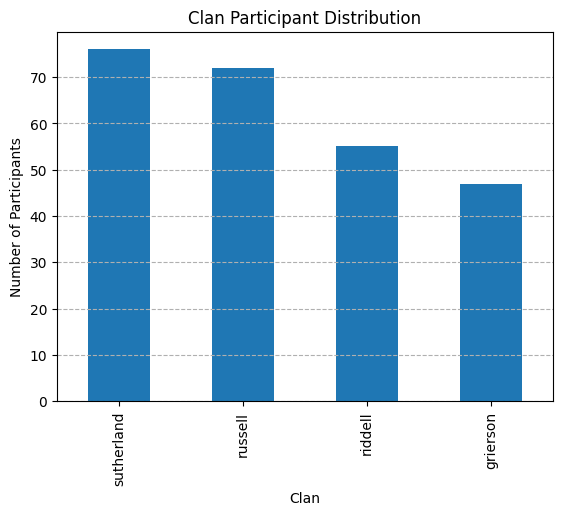

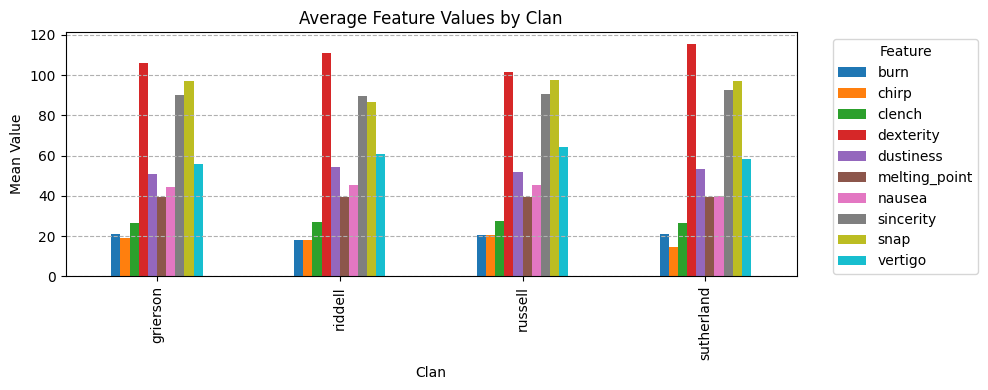

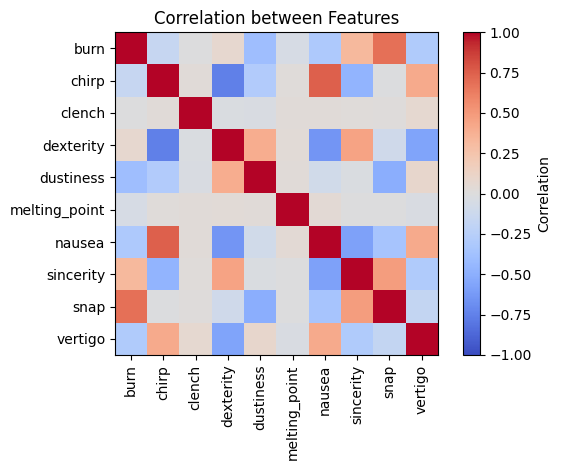

In [4]:
# TODO: add code for task 1

# Preparetion:
# Split the data into labelled and unlabelled
label_data = data[~data['clan'].isna()].copy() # Rows where clan is not missing
unlabel_data = data[data['clan'].isnull()].copy() # Rows where clan is missing

# Define the list of feature names
features = ['burn','chirp','clench','dexterity','dustiness',
            'melting_point','nausea','sincerity','snap','vertigo']
n_features = len(features)

# Make the list of clan
clans = sorted(label_data['clan'].unique())
n_clans = len(clans)


# 1. Count the number of participants from each clan in the known data (Bar Chart)
counts = label_data['clan'].value_counts()
counts.plot(kind='bar')
plt.title('Clan Participant Distribution')
plt.ylabel("Number of Participants")
plt.xlabel("Clan")
plt.grid(axis='y', linestyle='--')
plt.show()


# 2. Compare the average value of each feature between clans (Bar Chart)
means = label_data.groupby('clan')[features].mean()
means.plot(kind='bar', figsize=(10, 4))
plt.title('Average Feature Values by Clan')
plt.ylabel('Mean Value')
plt.xlabel('Clan')
plt.grid(axis='y', linestyle='--')
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='Feature')
plt.tight_layout()
plt.show()


# 3. Calculate the correlation between features (Heatmap)
corr = label_data[features].corr()
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(features)), features, rotation=90)
plt.yticks(range(len(features)), features)
plt.colorbar(label='Correlation')
plt.title('Correlation between Features')
plt.tight_layout()
plt.show()


**TODO**:
* briefly explain what you have done
and why

(max 50 words)

**ANSWER**:

I used the labelled data to make three plots:
* The first bar chart counts the number of participants for each clan, ensuring clan balance.
* The second bar chart compares feature averages between clans, showing which feature differ most.
* The third heatmap shows features correlations, checking for their relationship.


# Task 2: Who is who? (20 marks)

Although you have stats on all the moot participants, you do not know
which clans they belong to, nor how they fit into the game.

In this task, you are required to answer that first question: which clans
are the participants from?
* How will you formulate this as a machine learning problem?
* What assumptions do you need to make?
* How confident are you of your predictions?

When you have made your predictions, copy the values into the `answers` dataframe.

In [8]:
# TODO: add code for task 2

# Assume that the relationship between feature and clan is stable across years

# Try both Logistic Regression and kNN
# then use CV accuract to decide which predicts clan more reliably

# Get X and y for training
X_train = label_data[features].to_numpy(float)
y_train = label_data['clan'].astype('category')
class_names = list(y_train.cat.categories)
y_train_num = y_train.cat.codes.to_numpy()

# Get X from the unlabelled data for testing
X_test = unlabel_data[features].to_numpy(float)

# Standardisation
mean = X_train.mean(axis=0, keepdims=True)
std = X_train.std(axis=0, keepdims=True)
std[std == 0] = 1.0 # Avoid dividing by 0
X_train_std = (X_train - mean) / std # standardisation formula
X_test_std = (X_test - mean) / std

# Make a CV splitter
cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Model 1 :Logistic Regression
log_model = sklearn.linear_model.LogisticRegression(max_iter=5000)
log_scores = sklearn.model_selection.cross_val_score(log_model, X_train_std, y_train_num,
                             cv=cv, scoring='accuracy')
log_accuracy = log_scores.mean()
print("Logistic CV accuracy:", log_accuracy)

# Model 2 : kNN (try k=5)
knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_scores = sklearn.model_selection.cross_val_score(knn_model, X_train_std, y_train_num,
                             cv=cv, scoring='accuracy')
knn_accuracy = knn_scores.mean()
print("kNN CV accuracy:", knn_accuracy)

# Choose the better model
if knn_accuracy > log_accuracy:
  best_model_name = "kNN"
  best_model = knn_model
  best_accuracy = knn_accuracy
else:
  best_model_name = "LogisticRegression"
  best_model = log_model
  best_accuracy = log_accuracy

# Train the chosen model on all labelled data
best_model.fit(X_train_std, y_train_num)


# Predict clans for unlabelled data
test_probability = best_model.predict_proba(X_test_std)
test_pred_num = test_probability.argmax(axis=1)
test_pred_name = [class_names[i] for i in test_pred_num]
test_confidence = test_probability.max(axis=1)


# Put results into answers
answers = answers.copy()
mask = answers['clan'].isna()
answers.loc[mask, 'clan'] = test_pred_name
# answers.loc[mask, 'clan_confidence'] = test_confidence

# Check: display(answers[mask][features + ['clan','clan_confidence']].head(10))

Logistic CV accuracy: 0.9960000000000001
kNN CV accuracy: 0.9960000000000001


**TODO**:
* briefly explain what you have done and why

(max 50 words)

**ANSWER**

I trained two classifiers: Logistic Regression and kNN, in order to compare a simple linear and a flexible non-linear model, and then choose the better one by cross-validation to identify each participant's clan.

# Task 3: How are players ranked? (20 marks)

You know that Grachlangenball players are **ranked** on
a simple ordinal scale with three levels — 0, 1 and 2.
Players only compete against others of the same rank.

Each clan has its own traditional criteria for awarding ranks,
and they guard the details jealously. But by all accounts the
rules are very simple. As one informant undiplomatically noted
— after carefully making sure no clansfolk were within earshot —
“Not one o' these slaverin' dobbies can hold two thoughts in
their heads at the same time!”

Given last year's rankings, can you figure out the criteria for
each clan and assign ranks to all this year's participants?

Once again, when you have done so, add your rank predictions to
the `answers` table.

In [9]:
# TODO: add code for task 3

# Train a Decision Tree for each clan

clans = sorted(label_data['clan'].unique())
clan_models = {} # Used to store each clan's trained model
clan_cv_accuracy = {} # Used to store each clan's accuracy estimate

for c in clans:
  train_c = label_data[label_data['clan'] == c].copy()
  X_train_c = train_c[features].to_numpy(float)
  y_train_c = train_c['rank'].to_numpy(int)

  # Build a tree with deepth 1-3 and fit the model
  tree = sklearn.tree.DecisionTreeClassifier(max_depth=3, random_state=42)
  tree.fit(X_train_c, y_train_c)
  clan_models[c] = tree

  # Estimate accuracy of each clan by cross-validation
  n_samp = len(train_c)
  n_folds = max(3, min(5, n_samp))  # safe when clan has few samples
  cv = sklearn.model_selection.StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
  scores = sklearn.model_selection.cross_val_score(tree, X_train_c, y_train_c, cv=cv, scoring='accuracy')
  clan_cv_accuracy[c] = (scores.mean(), scores.std())


# Predict rank for this year's participants

new_unlab = answers['clan'].isna() | answers['rank'].isna()
this_year = data['clan'].isna()

features_new = data.loc[this_year, features].to_numpy(float)
predict_clans = answers.loc[this_year, 'clan'].astype(str).tolist() # predicted clans in Task 2

predict_ranks = []
predict_rank_confidence = []

for i, c in enumerate(predict_clans):
  x = features_new[i].reshape(1, -1)
  model = clan_models.get(c, None)
  probability = model.predict_proba(x)[0]
  predict_ranks.append(int(np.argmax(probability)))
  predict_rank_confidence.append(float(np.max(probability)))

# Put result into answers
answers = answers.copy()
idx_new = answers.index[this_year]
answers.loc[idx_new, 'rank'] = predict_ranks
# answers.loc[idx_new, 'rank_confidence'] = predict_rank_confidence


# Check: display(answers.loc[idx_new, features + ['clan','rank','rank_confidence']].head(10))

**TODO**:
* briefly explain what you have done and why
* state the ranking criteria for each clan

(max 50 words)

**ANSWER**:

I trained a Decision Tree for each clan with this year's data to predict the ranks:
* Grierson - high sincerity - rank 2
* Riddell - high dexterity - rank 2;
* Russell - high burn - rank 2;
* Sutherland - high snap - rank 2.

# Task 4: What is **prowess**? (20 marks)

When two players square off in a Grachlangenball match, the winner is
determined by their relative **prowess**.

This mysterious quality is defined and assessed by the Grachlangenball
Prowess Trust, a cabal of wily sages who lay down the rules of the game.
The Trust loudly proclaim their independence from all the clans, but
Machlearnia is a cynical place and conspiratorial rumours abound.

It is widely agreed that the Trust members are a cut above the
clansfolk intellectually, and the prowess calculation is not as
simple as the rankings. It *is* still fairly simple, though. According
to a down-at-heel bard you met in a tavern, whose unhappy romantic history
included not one but two members of the Trust, the prowess formula has
only “a handful” of terms, and he believed those terms to have
**integer coefficients**. Though he couldn't tell you what either of
those words mean.

Your task is to figure out what this formula is and work out the prowess
for all participants. Add those values into the `answers` dataframe too.

In [15]:
# TODO: add code for task 4

label_prowess = data[~data['prowess'].isna()].copy()
unlabel_prowess = data['prowess'].isna()

X = label_data[features].to_numpy(float)
y = label_data['prowess'].to_numpy(float)

# Train a LASSO regression model
lasso = sklearn.linear_model.LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

coefficients = lasso.coef_
intercept = lasso.intercept_

# Round the coefficients to nearest integers
nonzero = np.abs(coefficients) > 1e-6
coefficients_int = np.round(coefficients[nonzero]).astype(int)
features_int = np.array(features)[nonzero]
intercept_int = int(np.round(intercept))

# Predict prowess for this year
X_new = data.loc[unlabel_prowess, features].to_numpy(float)
prowess_new = X_new[:, nonzero] @ coefficients_int + intercept_int

answers = answers.copy()
answers.loc[unlabel_prowess, 'prowess'] = prowess_new

# Check: display(answers.loc[unlabel_prowess, features + ['prowess']].head(10))

**TODO**:
* briefly explain what you have done and why
* state the prowess formula you have inferred

(max 50 words)

**ANSWER**:

* I used LASSO regression to model prowess as a linear combination of the ten features. After rounding coefficients to integers.
* The inferred formula is : prowess = 6 x clench + 473 x melting_point - nausea + 4 x vertigo - 9271

# Task 5: Tournament (10 marks)

A Grachlangenball tournament consists of a **round robin** series of
matches between the clans, such that within each rank each clan plays
against every other clan exactly once. So there will be

$$
\binom{n_{clans}}{2} \times n_{ranks}
$$

matches — 12 in this case.

For each individual match, one player of the appropriate rank is chosen
at random from each of the two clans, and the two players go head to
head. The course of the game involves a lot of flexing and posturing,
psych-outs and threats, thrusts and parries, athleticism, skill and
furious appeals to the referee. At the end of which performance, and
regardless of whatever occurred in the meantime, the player with the
highest prowess is declared the winner.

Once all the matches have taken place, if there is one clan with the
most wins, that clan takes the title and the tournament is over. But
if there are multiple clans with the same highest number of wins, any
lower scoring clans are eliminated and the whole process starts over
with the remaining clans. This can continue for up to five complete
rounds. If there still isn't a clear winner on the fifth round, a draw
is declared.

**Nobody likes a draw.**

Given the rules as described above, together with the team stats
estimated in tasks 2–4, can you work out the approximate probabilities
of each clan winning this year's tournament?

In [12]:
# TODO: add code for task 5

this_year_mask = data['clan'].isna()
this_year_pred = answers.loc[this_year_mask, ['clan','rank','prowess']].copy()
this_year_pred['clan'] = this_year_pred['clan'].astype(str)
this_year_pred['rank'] = this_year_pred['rank'].astype(int)
this_year_pred['prowess'] = this_year_pred['prowess'].astype(float)

clans = sorted(this_year_pred['clan'].unique())
ranks = [0, 1, 2]

pools = {}
for c in clans:
  clan_data = this_year_pred[this_year_pred['clan'] == c]
  rank_dict = {}
  for r in ranks:
    rank_dict[r] = clan_data[clan_data['rank'] == r]['prowess'].to_numpy(float)
  pools[c] = rank_dict

# Define helper to pick random prowess from a clan-rank pool
rng = np.random.default_rng(42)

def sample_prowess(arr):
  "Pick one prowess value at random (with replacement)"

  if len(arr) == 0:
    return None
  idx = rng.integers(0, len(arr))
  return arr[idx]

def play_one_round(active_clans):
  wins = {c: 0 for c in active_clans} # Each clan starts with 0 wins
  for r in ranks:
    for i in range(len(active_clans)):
      for j in range(i + 1, len(active_clans)):
        c1, c2 = active_clans[i], active_clans[j]
        # Choose one random player from each clan’s rank r pool
        p1 = sample_prowess(pools[c1][r])
        p2 = sample_prowess(pools[c2][r])
        # If one clan has no player for that rank, the other wins automatically
        if p1 is None and p2 is None:
          continue
        elif p1 is None:
          wins[c2] += 1
          continue
        elif p2 is None:
          wins[c1] += 1
          continue

        # Compare prowess
        if p1 > p2:
          wins[c1] += 1
        elif p2 > p1:
          wins[c2] += 1
        else:
          # Randon winner
          if rng.random() < 0.5:
            wins[c1] += 1
          else:
            wins[c2] += 1
  return wins

# Define function to simulate an entire tournament
def simulate_tournament(max_rounds=5):
  current_clans = clans.copy()
  for _ in range(max_rounds):
    wins = play_one_round(current_clans)
    max_w = max(wins.values())
    top = [c for c, w in wins.items() if w == max_w]
    if len(top) == 1:
      return top  # Single winner
    else:
      # Eliminate lower scorers, replay with top clans
      current_clans = top
  return current_clans  # Draw after 5 rounds

# Run many simulations to estimate probabilities
n_simulations = 5000
win_counts = {c: 0 for c in clans}
draws = 0

for n in range(n_simulations):
  result = simulate_tournament()
  if len(result) == 1:
    win_counts[result[0]] += 1
  else:
    draws += 1
    share = 1.0 / len(result)
    for c in result:
      win_counts[c] += share

# Compute win probabilities
probs = {c: win_counts[c] / n_simulations for c in clans}
prob_df = pd.DataFrame({'Clan': list(probs.keys()),
                        'Win_Probability': [probs[c] for c in clans]})
prob_df = prob_df.sort_values('Win_Probability', ascending=False)


**TODO**:
* briefly explain what you have done and why
* what is your estimated win probability for each clan?

(max 50 words)

**ANSWER**:

* I simulated 5000 full tournaments using the predicted data for this year's participants and each winner was the player with higher prowess.
* Estimated win probabilities are: Riddell 31.6 %, Russell 24.1 %, Sutherland 22.2 %, Grierson 22.2 %

# Task 6: What chance peace? (10 marks)

As already noted, **nobody likes a draw.**

Draws are no fun. All bets are void. Machlearnia has no Heroes.

There is (according to the grim precepts of the clans) honour in
losing bravely against a valiant foe. But there is no honour in
losing to also-losers. *Everyone* loses. Everyone slinks home
shamefaced, vowing never to speak of it again.

It is generally understood that this level of shame is not
sustainable. If the moot were to **end in a draw for two years
running**, the clans would inevitably cast aside the empty
masquerade of “peace” and return to their traditional pastimes
of slaughter and mayhem.

At the same time, **nobody likes an unwinnable game**. If the
same clan keeps winning year after year after year, what's even
the point in playing? Might as well go on a bloody rampage with
lashings of the old ultraviolence.

The clans respect strength and are more tolerant of dominance than
equality. But **five wins in a row** would stir up suspicions as to
the impartiality of the Grachlangenball Prowess Trust — with inevitably
brutal consequences.

You don't know what the result was last year, only that it concluded
peacefully.

How likely is it that this Clanmoot will end in a bloodbath?

For that matter, how surprising is it that the current peace has
held for 38 years?

In [13]:
# TODO: add code for task 6

# Using the win probabilities in Task 5
p = {
    'riddell':   0.3156,
    'russell':   0.2406,
    'sutherland':0.2220,
    'grierson':  0.2218
}

p_draw = 0.0 # The probability that draw

s = sum([pi**5 for pi in p.values()])# The probability that a fixed 5-year block is a 5-peat by some clan

# The probability that some clan wins 5
bloodbath_this_year_approx = s

# Peace over 38 years (no 5-peat in any 5-year):
years = 38
windows = years - 5 + 1  # overlapping windows
peace_38years_approx = (1 - s) ** windows
bloodbath_within_38years_approx = 1 - peace_38years_approx

# Monte-Carlo simulation
rng = np.random.default_rng(42)

def simulate_years(num_years=38, probs=p, p_draw=0.0):
  "Simulate a sequence of yearly winners."

  clans = list(probs.keys())
  weights = np.array([probs[c] for c in clans], dtype=float)
  w_draw = p_draw
  # Normalise to include draw option
  if w_draw > 0:
    cats = clans + ['draw']
    w = np.append(weights, w_draw)
    w = w / w.sum()
  else:
    cats = clans
    w = weights / weights.sum()

  wins = []
  for n in range(num_years):
    idx = rng.choice(len(cats), p=w)
    wins.append(cats[idx])

  # Check two draws in a row
  drew_two_in_row = any(wins[i]=='draw' and wins[i+1]=='draw' for i in range(len(wins)-1))

  # Check any 5-peat by a clan
  five_peat_happened = False
  if len(wins) >= 5:
    for i in range(len(wins) - 4):
      block = wins[i:i+5]
      if 'draw' in block:
        continue
      if all(x == block[0] for x in block):
        five_peat_happened = True
        break

  return drew_two_in_row, five_peat_happened

# Monte-Carlo estimates
N = 20000
bloodbath_this_year_mc = 0.0   # for a fixed 5-year window
bloodbath_38yrs_mc = 0.0
peace_38yrs_mc = 0.0

# For a simple 5-year window
for n in range(N):
  n, five_peat = simulate_years(num_years=5, probs=p, p_draw=p_draw)
  bloodbath_this_year_mc += 1.0 if five_peat else 0.0
bloodbath_this_year_mc /= N

# Over 38 years
no_bloodbath_count = 0
for n in range(N):
  two_draws, five_peat = simulate_years(num_years=38, probs=p, p_draw=p_draw)
  bloodbath = (two_draws or five_peat)
  if not bloodbath:
    no_bloodbath_count += 1
bloodbath_38yrs_mc = 1 - (no_bloodbath_count / N)
peace_38yrs_mc = 1 - bloodbath_38yrs_mc


**TODO**:
* briefly explain what you have done and why
* should you get the hell out of Dodge?

(max 50 words)

**ANSWER**:

* I modelled 38 years of tournaments using each clan's win probabilities from Task 5, the result show a bloodbath chance ≈ 0.5 %
* It is safe to stay.

# Exporting & Submitting

You should submit your answers via Moodle. Text and code will be
manually graded in this notebook. Your predictions for tasks 4—6 will
be marked automatically.

* Ensure that your predictions for **clan**, **rank** and **prowess**
are recorded in the `answers` dataframe.
* Run the cell below to export the `answers` dataframe as a CSV file.


In [14]:
answers.to_csv('1577215249.csv', index=False)

* Download both the `1577215249.csv` file you just exported and your
completed notebook file (`1577215249.ipynb`).
* Zip both files into an archive called `1577215249.zip` and submit
this using the coursework submission activity on Moodle.